# Fake News
## Risdal Fake Data set

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read in csv file as pandas dataframe, view columns and headers
df = pd.read_csv("fake.csv")
#df.head(5)

In [4]:
labels = df['type'].unique().tolist()
labels

['bias', 'conspiracy', 'fake', 'bs', 'satire', 'hate', 'junksci', 'state']

In [7]:
risdal_dict = {}
for lab in labels:
    count = df[df['type']==lab].count()['type']
    risdal_dict[lab] = count
risdal_dict

{'bias': 443,
 'conspiracy': 430,
 'fake': 19,
 'bs': 11492,
 'satire': 146,
 'hate': 246,
 'junksci': 102,
 'state': 121}

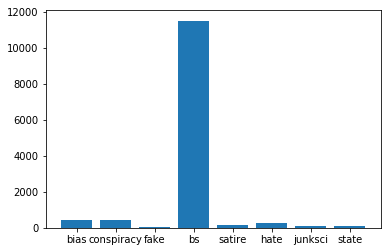

In [10]:
names = list(label_dict.keys())
value = list(label_dict.values())
plt.bar(range(len(label_dict)), value, tick_label=names)
plt.show()

In [12]:
bs_df = df[df['type']=='bs']
bs_df = bs_df[['title', 'text', 'type']]
bs_df.head(5)

,title,text,type
59,#2816: Clinton Pride’s 8(a) Pig Farm Bridge – ...,United States Marine Field McConnell Plum Cit...,bs
60,NaN,"So ,you have Rothschild banksters and British ...",bs
61,NaN,Here is the problem . The USA constitution sta...,bs
62,NaN,There is plenty of proof the machines are rigg...,bs
63,NaN,Trump has an excuse now to audit any vote with...,bs


## Pre Process Data
### Lemmatize data
#### Need to rework regex to get rid of URLs 

In [13]:
# Create a method to prepare the data
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#Remove everything except letter text, lowercase the text, split to list
# lemmatize each word in the list in the list comprehension
# join the text back to a string, return the string value
def process_data(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    text = text.split()
    wl = WordNetLemmatizer()
    text = [wl.lemmatize(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

### Pre processing the data takes a very long time... mine took somewhere between 30-60 min
#### It would be good to make a 'good' dataset that we could end up writing to csv so each time we work on it, we just read the csv rather than having to pre-process data from a raw file each time

In [14]:
#apply the method on the column
bs_df['text'] = bs_df['text'].apply(process_data)
print("done")

done


In [15]:
#writing to new csv files
bs_df.to_csv("bs_prepped.csv", index=False)

## Generate Word Cloud of top-n words among all corpus

In [16]:
all_words = ' '.join([text for text in bs_df['text']])

In [18]:
from wordcloud import WordCloud

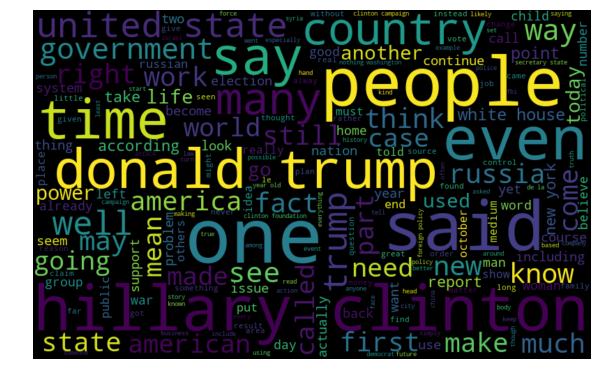

In [19]:
wc = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [20]:
sorted_items = list(wc.words_.keys())
sorted_items

['one',
 'people',
 'said',
 'hillary clinton',
 'even',
 'time',
 'donald trump',
 'say',
 'country',
 'many',
 'united state',
 'trump',
 'well',
 'government',
 'way',
 'see',
 'know',
 'may',
 'think',
 'fact',
 'new',
 'russia',
 'work',
 'right',
 'make',
 'much',
 'come',
 'america',
 'state',
 'still',
 'first',
 'need',
 'mean',
 'american',
 'case',
 'world',
 'going',
 'called',
 'made',
 'part',
 'power',
 'go',
 'used',
 'another',
 'life',
 'today',
 'white house',
 'point',
 'according',
 'new york',
 'report',
 'take',
 'including',
 'election',
 'course',
 'year',
 'nation',
 'use',
 'yet',
 'back',
 'issue',
 'two',
 'look',
 'thing',
 'want',
 'become',
 'support',
 'seem',
 'system',
 'continue',
 'actually',
 'call',
 'problem',
 'already',
 'child',
 'war',
 'believe',
 'group',
 'good',
 'woman',
 'man',
 'word',
 'left',
 'day',
 'number',
 'home',
 'russian',
 'others',
 'end',
 'public',
 'put',
 'really',
 'told',
 'october',
 'show',
 'place',
 'idea',
 'med

In [23]:
wc_dict = wc.words_

In [24]:
wc_dict

{'one': 1.0,
 'people': 0.7713547874453714,
 'said': 0.7712554628526023,
 'hillary clinton': 0.7566547477155343,
 'even': 0.7073897497020262,
 'time': 0.5737981724274931,
 'donald trump': 0.5539332538736591,
 'say': 0.5036750099324593,
 'country': 0.4915574096146206,
 'many': 0.4871871275327771,
 'united state': 0.46384584823202224,
 'trump': 0.45232419547079855,
 'well': 0.43861740166865315,
 'government': 0.4129916567342074,
 'way': 0.4087206992451331,
 'see': 0.39690107270560193,
 'know': 0.36034962256654746,
 'may': 0.35647596344854987,
 'think': 0.34932459276916966,
 'fact': 0.3463448549860946,
 'new': 0.3377036154151768,
 'russia': 0.323202224870878,
 'work': 0.31992451330949545,
 'right': 0.31436233611442194,
 'make': 0.3124751688518077,
 'much': 0.3115812475168852,
 'come': 0.31078665077473183,
 'america': 0.3054231227651967,
 'state': 0.30492649980135084,
 'still': 0.3038339292808899,
 'first': 0.29698053237981725,
 'need': 0.28645212554628524,
 'mean': 0.2852602304330552,
 'a

# View other data sets
## BuzzFeed

In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# read in csv file as pandas dataframe, view columns and headers
buzzf = pd.read_csv("buzzfeedcorpus.csv")

In [8]:
buzz_labels = buzzf['veracity'].unique().tolist()
buzz_dict = {}
for lab in buzz_labels:
    count = buzzf[buzzf['veracity']==lab].count()['veracity']
    buzz_dict[lab] = count
buzz_dict

{'mostly true': 1264,
 'no factual content': 64,
 'mixture of true and false': 212,
 'mostly false': 87}

## News from Michael

In [9]:
news_m = pd.read_csv("news.csv")
news_m.head(5)

,content,class,source,file_name
0,"Alex Jones Vindicated in ""Pizzagate"" Controver...",fake,news,biz01.fake.txt
1,THE BIG DATA CONSPIRACYGovernment and Silicon ...,fake,news,biz02.fake.txt
2,California Surprisingly Lenient on Auto Emissi...,fake,news,biz03.fake.txt
3,Mexicans Are Chomping at the Bit to Stop NAFTA...,fake,news,biz04.fake.txt
4,Breaking News: Snapchat to purchase Twitter fo...,fake,news,biz05.fake.txt


In [11]:
news_labels = news_m['class'].unique().tolist()
news_dict = {}
for lab in news_labels:
    count = news_m[news_m['class']==lab].count()['class']
    news_dict[lab] = count
news_dict

{'fake': 240, 'legit': 240}

## Celebrity

In [35]:
celeb = pd.read_csv('celebrity.csv')

In [36]:
celeb_labels = celeb['class'].unique().tolist()
celeb_dict = {}
for lab in celeb_labels:
    count = celeb[celeb['class']==lab].count()['class']
    celeb_dict[lab] = count
celeb_dict

{'fake': 250, 'legit': 250}

## real_fake - McIntire

In [37]:
real_fake = pd.read_csv('fake_or_real_news.csv')

In [40]:
rof_labels = real_fake['label'].unique().tolist()
rof_dict = {}
for lab in rof_labels:
    count = real_fake[real_fake['label']==lab].count()['label']
    rof_dict[lab] = count
rof_dict

{'FAKE': 3164, 'REAL': 3171}

# Appendix - Testing

In [ ]:
# read in csv file as pandas dataframe, view columns and headers
d2 = pd.read_csv("bs_prepped.csv")

In [ ]:
d2[:10]

## n-grams

In [ ]:
from nltk import FreqDist
from nltk.util import ngrams    

bigramfdist = FreqDist()


#tokens is the text in the corpus
bigrams = ngrams(tokens, 2)

bigramfdist.update(bigrams)

In [ ]:
#process bigram column from processed
def to_ngram(text, column_name, count=2):
    bigrams = ngrams(text, count)
    